# TensorFlow & Keras - Basics of Deep Learning

### Most importantly... resources

https://www.tensorflow.org/api_docs

https://keras.io/

https://www.tensorflow.org/tutorials/

https://www.google.com

## TF overview

* #### "End-to-end machine learning platform" 

    - Not the only one! Check out PyTorch, Theano, Cognitive Toolkit.
   
* #### Integrates with high-level APIs like Keras
* #### Plays nice with Pandas
* #### Makes deep learning *fast* and *easy* *
    *<sup>"easy"</sup>

## Tasks for TensorFlow:

* #### Regression
    - Predict house prices
    - Predict drug metabolic rates
    - Predict stock trends *
    
    *<sup>this is super hard</sup>
    
    

* #### Classification
    - Cat or dog?
    - Malignant or benign cancer from images
    ![](media/dr.png)
    <span style="font-size:0.75em;">Google AI Blog: Diabetic Retinopathy</span>



* #### Dimensionality reduction
    - Visualize high-dimensional data in 2 or 3-D space
    - Compress representations for successive ML



* #### Generative models
    - Create new molecules with desirable properties
    - Artificially enhance image resolution
    ![](media/molecular_gan.png)
    <span style="font-size:0.75em;">Kadurin et al., 2017</span>


* #### Reinforcement learning
    - Can't beat your friends at chess? Make your computer do it



* #### Much more...
    - Generic math
    - Probabilistic programming with TFP
    - Automatic differentiation
    - ...


## Let's Regress

### Imports!

In [4]:
import numpy as np
import pandas as pd

Name a more iconic duo, I'll wait

#### New imports -- TF and Keras

In [1]:
import keras
import tensorflow as tf

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Check our versions for good measure -- these programs may have very different behavior version-to-version

In [2]:
print(keras.__version__)
print(tf.__version__)

2.2.4
1.12.0


#### Loading in housing data as with SKLearn

In [5]:
data = pd.read_csv('kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [7]:
data["yr_built"].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)

In [6]:
column_selection = ["bedrooms","bathrooms","sqft_living","sqft_lot",
                    "floors","condition","grade","sqft_above",
                    "sqft_basement","sqft_living15","sqft_lot15",
                    "lat", "long","yr_built","yr_renovated","waterfront"]

selected_feature = np.array(data[column_selection])
price = np.array(data["price"])
selected_feature_train = selected_feature[:20000]
price_train = price[:20000]

selected_feature_test = selected_feature[20000:]
price_test = price[20000:]

In [8]:
def score(y,y_pred):
    return np.mean(np.abs(y-y_pred)/y)

In [9]:
model = keras.Sequential()

In [10]:
input_len = len(column_selection)
model.add(keras.layers.Dense(50, input_dim=input_len, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(1))

In [11]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [54]:
history = model.fit(selected_feature_train, price_train,
                        epochs=50, batch_size=128)

Epoch 1/50
20000/20000 [==============================] - 1s 48us/step - loss: 362423227672.1664
Epoch 2/50
20000/20000 [==============================] - 0s 9us/step - loss: 241266003673.0880
Epoch 3/50
20000/20000 [==============================] - 0s 9us/step - loss: 104657655149.3632
Epoch 4/50
20000/20000 [==============================] - 0s 9us/step - loss: 76096611719.5776
Epoch 5/50
20000/20000 [==============================] - 0s 9us/step - loss: 74086634251.8784
Epoch 6/50
20000/20000 [==============================] - 0s 9us/step - loss: 72355529228.2880
Epoch 7/50
20000/20000 [==============================] - 0s 9us/step - loss: 70839192594.0224
Epoch 8/50
20000/20000 [==============================] - 0s 9us/step - loss: 69601997766.6560
Epoch 9/50
20000/20000 [==============================] - 0s 9us/step - loss: 68416932983.6032
Epoch 10/50
20000/20000 [==============================] - 0s 9us/step - loss: 67236469722.3168
Epoch 11/50
20000/20000 [====================

In [12]:
preds = model.predict(selected_feature_test)
score(preds, price_test)

2354.81517370684

### Like SKLearn, it's easy to train and evaluate simple models.
#### ... but we should try to do better

## Practical Deep Learning -- What you need to know
### Train, Validation, Test:
   * Optimize parameters with Train (weights, biases)
   * Optimize hyperparameters with Validation (layer width & depth, activation functions, etc.)
   * Optimize NOTHING with Test

In [16]:
# Split out a validation set for hyperparameter optimization

selected_feature_train = selected_feature[:18000]
price_train = price[:18000]
selected_feature_val = selected_feature[18000:20000]
price_val = price[18000:20000]
selected_feature_test = selected_feature[20000:]
price_test = price[20000:]

### Try a hyperparameter optimization:

### Try three activation functions to use for dense layers in the neural network above. Save the model that achieves the best validation loss 

#### Hint: [activation functions](http://letmegooglethat.com/?q=keras+activation+functions)

#### Hint: `model.fit` has argument "`validation_data`" which takes a tuple of features and targets

#### Hint: Use `model.save("filename.h5")` to save a model locally. If you want to use it later, just call `keras.models.load_model("filename.h5")`

In [17]:
# For easy looping, define neural network model as a function
def nn_model(optimizer='adam',
             activation='relu',
             layers=[20,20],
             loss='mean_squared_error'):
    
    model = keras.Sequential()
    model.add(keras.layers.Dense(50, input_dim=input_len, activation=activ))
    model.add(keras.layers.Dense(50, activation=activ))
    model.add(keras.layers.Dense(1))

    model.compile(loss='mean_absolute_error', optimizer='adam')
    
    return model

In [15]:
best_score = 1000.0 # bad

# loop over chosen activation functions, train, evaluate on validation
for activ in ['sigmoid', 'tanh', 'relu']:
    model = nn_model(activation=activ)

    history = model.fit(selected_feature_train, price_train,
                epochs=50, batch_size=128,
                validation_data=(selected_feature_val, price_val))
    model_score = score(model.predict(selected_feature_val), price_val)

    if model_score < best_score:
        best_score = model_score
        best_activ = activ
        best_model = model
        best_train = history

print(f"BEST ACTIVATION FUNCTION {best_activ} WITH SCORE {best_score}")
best_model.save("awesome_model.h5")


Train on 18000 samples, validate on 2000 samples
Epoch 1/50
18000/18000 [==============================] - 1s 31us/step - loss: 532974.0115 - val_loss: 557914.0565
Epoch 2/50
18000/18000 [==============================] - 0s 10us/step - loss: 532966.4315 - val_loss: 557907.7440
Epoch 3/50
18000/18000 [==============================] - 0s 10us/step - loss: 532960.4552 - val_loss: 557902.0385
Epoch 4/50
18000/18000 [==============================] - 0s 10us/step - loss: 532954.8337 - val_loss: 557896.6045
Epoch 5/50
18000/18000 [==============================] - 0s 10us/step - loss: 532949.3721 - val_loss: 557891.0965
Epoch 6/50
18000/18000 [==============================] - 0s 11us/step - loss: 532943.7817 - val_loss: 557885.2920
Epoch 7/50
18000/18000 [==============================] - 0s 10us/step - loss: 532938.0435 - val_loss: 557879.6830
Epoch 8/50
18000/18000 [==============================] - 0s 10us/step - loss: 532932.4725 - val_loss: 557874.1570
Epoch 9/50
18000/18000 [=======

18000/18000 [==============================] - 0s 10us/step - loss: 532830.1402 - val_loss: 557770.8590
Epoch 21/50
18000/18000 [==============================] - 0s 10us/step - loss: 532822.9454 - val_loss: 557763.7420
Epoch 22/50
18000/18000 [==============================] - 0s 10us/step - loss: 532815.7507 - val_loss: 557756.6145
Epoch 23/50
18000/18000 [==============================] - 0s 10us/step - loss: 532808.5511 - val_loss: 557749.3160
Epoch 24/50
18000/18000 [==============================] - 0s 10us/step - loss: 532801.3553 - val_loss: 557742.1610
Epoch 25/50
18000/18000 [==============================] - 0s 10us/step - loss: 532794.1591 - val_loss: 557734.8650
Epoch 26/50
18000/18000 [==============================] - 0s 10us/step - loss: 532786.9602 - val_loss: 557727.7420
Epoch 27/50
18000/18000 [==============================] - 0s 11us/step - loss: 532779.7653 - val_loss: 557720.6205
Epoch 28/50
18000/18000 [==============================] - 0s 10us/step - loss: 5327

18000/18000 [==============================] - 0s 10us/step - loss: 153565.2268 - val_loss: 166097.1311
Epoch 41/50
18000/18000 [==============================] - 0s 10us/step - loss: 153216.4195 - val_loss: 165510.6073
Epoch 42/50
18000/18000 [==============================] - 0s 10us/step - loss: 153325.5166 - val_loss: 166323.6279
Epoch 43/50
18000/18000 [==============================] - 0s 10us/step - loss: 153462.2408 - val_loss: 165405.9931
Epoch 44/50
18000/18000 [==============================] - 0s 10us/step - loss: 153027.9525 - val_loss: 165772.9790
Epoch 45/50
18000/18000 [==============================] - 0s 10us/step - loss: 152805.2123 - val_loss: 165447.2462
Epoch 46/50
18000/18000 [==============================] - 0s 10us/step - loss: 152676.3412 - val_loss: 165712.0539
Epoch 47/50
18000/18000 [==============================] - 0s 10us/step - loss: 152723.5669 - val_loss: 165205.6867
Epoch 48/50
18000/18000 [==============================] - 0s 10us/step - loss: 1527

### Visualize your training:

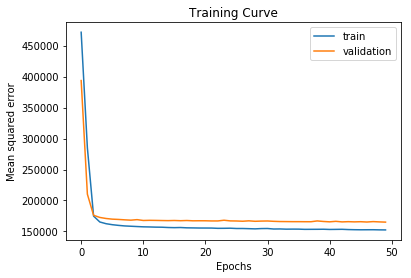

In [23]:
import matplotlib.pyplot as plt

# plot loss during training
def plot_loss(hist):
    %matplotlib inline
    plt.title('Training Curve')
    plt.plot(hist.history['loss'], label='train')
    plt.plot(hist.history['val_loss'], label='validation')
    plt.xlabel("Epochs")
    plt.ylabel("Mean squared error")
    plt.legend()
    plt.show()

plot_loss(best_train)

#### In the future, try better validation schemes like [k-fold cross validation](https://chrisalbon.com/deep_learning/keras/k-fold_cross-validating_neural_networks/), though 80/20 or 90/10 train/val like this works in a pinch

### Standardize your features:
* Typically assumes normally distributed feature, shifting mean to 0 and standard deviation to 1
* In theory does not matter for neural networks
* In practice tends to matter for neural networks
* Scale if using:
    - Logistic regression
    - Support vector machines
    - Perceptrons
    - Neural networks
    - Principle component analysis
* Don't bother if using:
    - "Forest" methods
    - Naive Bayes

In [24]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
in_scaler = StandardScaler()

# Fit scaler to the training set and perform the transformation
selected_feature_train = in_scaler.fit_transform(selected_feature_train)

# Use the fitted scaler to transform validation and test features
selected_feature_val = in_scaler.transform(selected_feature_val)
selected_feature_test = in_scaler.transform(selected_feature_test)

# Check appropriate scaling
print(np.mean(selected_feature_train[:,0]))
print(np.std(selected_feature_train[:,0]))

print(np.mean(selected_feature_val[:,0]))
print(np.std(selected_feature_val[:,0]))

print(np.mean(selected_feature_test[:,0]))
print(np.std(selected_feature_test[:,0]))

-1.5395092608135503e-17
1.0
0.016119707489855948
0.9970087526331802
0.09330835574898905
0.9414925643047213


Train on 18000 samples, validate on 2000 samples
Epoch 1/200
18000/18000 [==============================] - 1s 30us/step - loss: 416643360664.2347 - val_loss: 456226459090.9440
Epoch 2/200
18000/18000 [==============================] - 0s 10us/step - loss: 416175119983.5022 - val_loss: 455096928829.4401
Epoch 3/200
18000/18000 [==============================] - 0s 10us/step - loss: 414325133541.3760 - val_loss: 451825760731.1359
Epoch 4/200
18000/18000 [==============================] - 0s 10us/step - loss: 410124513735.1111 - val_loss: 445473112981.5040
Epoch 5/200
18000/18000 [==============================] - 0s 11us/step - loss: 402882324099.5271 - val_loss: 435331354329.0880
Epoch 6/200
18000/18000 [==============================] - 0s 10us/step - loss: 391998989372.9849 - val_loss: 420808691810.3040
Epoch 7/200
18000/18000 [==============================] - 0s 10us/step - loss: 377252354399.3458 - val_loss: 401978543308.8000
Epoch 8/200
18000/18000 [==============================

Epoch 65/200
18000/18000 [==============================] - 0s 10us/step - loss: 47657568632.8320 - val_loss: 51346588499.9680
Epoch 66/200
18000/18000 [==============================] - 0s 10us/step - loss: 47021006868.0249 - val_loss: 50762424352.7680
Epoch 67/200
18000/18000 [==============================] - 0s 10us/step - loss: 46416208667.5342 - val_loss: 50203192000.5120
Epoch 68/200
18000/18000 [==============================] - 0s 10us/step - loss: 45808373923.8400 - val_loss: 49657908953.0880
Epoch 69/200
18000/18000 [==============================] - 0s 10us/step - loss: 45224969693.8667 - val_loss: 49126869663.7440
Epoch 70/200
18000/18000 [==============================] - 0s 10us/step - loss: 44664304427.9182 - val_loss: 48596182695.9360
Epoch 71/200
18000/18000 [==============================] - 0s 10us/step - loss: 44094973529.6569 - val_loss: 48087944560.6400
Epoch 72/200
18000/18000 [==============================] - 0s 10us/step - loss: 43552793566.3218 - val_loss: 4

18000/18000 [==============================] - 0s 10us/step - loss: 34367007125.9591 - val_loss: 39569588060.1600
Epoch 130/200
18000/18000 [==============================] - 0s 10us/step - loss: 34323841872.3271 - val_loss: 39494117163.0080
Epoch 131/200
18000/18000 [==============================] - 0s 10us/step - loss: 34272800524.0604 - val_loss: 39461744836.6080
Epoch 132/200
18000/18000 [==============================] - 0s 10us/step - loss: 34229787495.9929 - val_loss: 39433501212.6720
Epoch 133/200
18000/18000 [==============================] - 0s 10us/step - loss: 34190131271.9076 - val_loss: 39354671890.4320
Epoch 134/200
18000/18000 [==============================] - 0s 10us/step - loss: 34145208580.3236 - val_loss: 39342513815.5520
Epoch 135/200
18000/18000 [==============================] - 0s 10us/step - loss: 34111710323.5982 - val_loss: 39268700422.1440
Epoch 136/200
18000/18000 [==============================] - 0s 10us/step - loss: 34060546237.3262 - val_loss: 3924689

18000/18000 [==============================] - 0s 11us/step - loss: 32510420764.4444 - val_loss: 37674415620.0960
Epoch 194/200
18000/18000 [==============================] - 0s 10us/step - loss: 32487788407.4667 - val_loss: 37644449415.1680
Epoch 195/200
18000/18000 [==============================] - 0s 10us/step - loss: 32481990339.2427 - val_loss: 37624811814.9120
Epoch 196/200
18000/18000 [==============================] - 0s 10us/step - loss: 32462005141.5040 - val_loss: 37613180289.0240
Epoch 197/200
18000/18000 [==============================] - 0s 11us/step - loss: 32434488366.4213 - val_loss: 37617174872.0640
Epoch 198/200
18000/18000 [==============================] - 0s 11us/step - loss: 32415562995.0293 - val_loss: 37598212128.7680
Epoch 199/200
18000/18000 [==============================] - 0s 10us/step - loss: 32399816299.8613 - val_loss: 37554884968.4480
Epoch 200/200
18000/18000 [==============================] - 0s 11us/step - loss: 32376786528.9387 - val_loss: 3753735

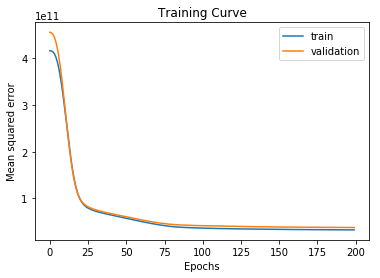

In [25]:
model = nn_model()

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(selected_feature_train, price_train,
            epochs=200, batch_size=128,
            validation_data=(selected_feature_val, price_val))
model_score = score(model.predict(selected_feature_val), price_val)
print(model_score)

plot_loss(history)

#### In the future, consider standardizing outputs as well

### Regularize:
* Heavily parameterized models like neural networks are prone to overfitting
* Popular off-the-shelf tools exist to regularize models and prevent overfitting:
    - L2 regularization (weight decay)
    - Dropout
    - Batch normalization
    
#### These tools come as standard Keras/TF layers!
`model.add(keras.layers.Dropout(rate)`
`model.add(keras.layers.ActivityRegularization(l1=0.0, l2=0.0)`
`model.add(keras.layers.BatchNormalization())`

### Early stopping and model checkpointing:
#### It's unlikely the last iteration is the best, and who knows how long until the thing is converged. Just grab the best validation error.

In [ ]:
# Set callback functions to early stop training and save the 
# best model so far
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_loss', patience=2),
            ModelCheckpoint(filepath='best_model.h5',
                            monitor='val_loss',
                            save_best_only=True,
                           verbose=1)]

model = nn_model(layers=[20,20,20])

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(selected_feature_train, price_train,
            epochs=400, callbacks=callbacks, batch_size=128,
            validation_data=(selected_feature_val, price_val))

model_score = score(model.predict(selected_feature_val), price_val)
print(f"Model score: {model_score}")
plot_loss(history)

Train on 18000 samples, validate on 2000 samples
Epoch 1/400
18000/18000 [==============================] - 1s 33us/step - loss: 416651544421.2622 - val_loss: 456259511517.1840

Epoch 00001: val_loss improved from inf to 456259511517.18402, saving model to best_model.h5
Epoch 2/400
18000/18000 [==============================] - 0s 11us/step - loss: 416275351615.7155 - val_loss: 455326677860.3519

Epoch 00002: val_loss improved from 456259511517.18402 to 455326677860.35199, saving model to best_model.h5
Epoch 3/400
18000/18000 [==============================] - 0s 11us/step - loss: 414689964880.3271 - val_loss: 452503833411.5840

Epoch 00003: val_loss improved from 455326677860.35199 to 452503833411.58398, saving model to best_model.h5
Epoch 4/400
18000/18000 [==============================] - 0s 11us/step - loss: 411070708609.4791 - val_loss: 446986228334.5920

Epoch 00004: val_loss improved from 452503833411.58398 to 446986228334.59198, saving model to best_model.h5
Epoch 5/400
18000/


Epoch 00035: val_loss improved from 71949478526.97600 to 71087979429.88800, saving model to best_model.h5
Epoch 36/400
18000/18000 [==============================] - 0s 11us/step - loss: 67020454435.9538 - val_loss: 70269258629.1200

Epoch 00036: val_loss improved from 71087979429.88800 to 70269258629.12000, saving model to best_model.h5
Epoch 37/400
18000/18000 [==============================] - 0s 12us/step - loss: 66249264176.2418 - val_loss: 69490233540.6080

Epoch 00037: val_loss improved from 70269258629.12000 to 69490233540.60800, saving model to best_model.h5
Epoch 38/400
18000/18000 [==============================] - 0s 11us/step - loss: 65487839723.5200 - val_loss: 68727250124.8000

Epoch 00038: val_loss improved from 69490233540.60800 to 68727250124.80000, saving model to best_model.h5
Epoch 39/400
18000/18000 [==============================] - 0s 10us/step - loss: 64752765173.7600 - val_loss: 67985605165.0560

Epoch 00039: val_loss improved from 68727250124.80000 to 679856

18000/18000 [==============================] - 0s 10us/step - loss: 43743356263.5378 - val_loss: 47804756328.4480

Epoch 00071: val_loss improved from 48290853781.50400 to 47804756328.44800, saving model to best_model.h5
Epoch 72/400
18000/18000 [==============================] - 0s 11us/step - loss: 43205840306.1760 - val_loss: 47318267658.2400

Epoch 00072: val_loss improved from 47804756328.44800 to 47318267658.24000, saving model to best_model.h5
Epoch 73/400
18000/18000 [==============================] - 0s 11us/step - loss: 42700101029.4329 - val_loss: 46844257730.5600

Epoch 00073: val_loss improved from 47318267658.24000 to 46844257730.56000, saving model to best_model.h5
Epoch 74/400
18000/18000 [==============================] - 0s 10us/step - loss: 42188321698.2471 - val_loss: 46398046797.8240

Epoch 00074: val_loss improved from 46844257730.56000 to 46398046797.82400, saving model to best_model.h5
Epoch 75/400
18000/18000 [==============================] - 0s 10us/step - lo

### You don't have to remember these resources because they're here when you need them
https://www.tensorflow.org/api_docs

https://keras.io/

https://www.tensorflow.org/tutorials/

https://www.google.com

### Don't trust me, trust your validation errors
### Don't look at your test set until you're actually going to test